In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pwd

/content


In [3]:
import sys
IN_COLAB = 'google.colab' in sys.modules
IN_COLAB

True

In [4]:
BASE_PATH = '/content/drive/MyDrive/ai/ycup21/'

# Copy data

In [36]:
os.chdir('/content')

In [37]:
BASE_PATH_DATA = '/content/drive/MyDrive/ai/ycup21/data/'

In [38]:
!ls {BASE_PATH_DATA}

id_to_remove.npy  index_to_remove.npy  metadata.json  ycup21-images-1.tgz


In [39]:
%%time
file_name = 'ycup21-images-1.tgz'
file_path = BASE_PATH_DATA + file_name
local_path = f'./{file_name}'

!cp {file_path} .
!tar -xf {local_path}

CPU times: user 110 ms, sys: 45.4 ms, total: 155 ms
Wall time: 15.3 s


# Install libs

In [30]:
!pip install segmentation_models_pytorch

     |████████████████████████████████| 87 kB 3.2 MB/s 
     |████████████████████████████████| 58 kB 6.2 MB/s 
     |████████████████████████████████| 376 kB 34.9 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=0624f8cd3f8d20c04721b3c7e56cf509fa223c048ecb72e04267d820f1065178
  Stored in directory: /root/.cache/pip/wheels/90/6b/0c/f0ad36d00310e65390b0d4c9218ae6250ac579c92540c9097a
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=6ac805d84ca9ec57cf967f94b039837e059e590a3a265892d52b9a2f6687cdde
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels


In [5]:
!pip install bpemb

     |████████████████████████████████| 1.2 MB 5.2 MB/s 


In [6]:
!pip install hydra-core --upgrade

     |████████████████████████████████| 145 kB 5.2 MB/s 
     |████████████████████████████████| 112 kB 40.8 MB/s 
     |████████████████████████████████| 74 kB 3.7 MB/s 
     |████████████████████████████████| 636 kB 67.1 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=13caef0448f26d53e20515d41cd8fd762865724d3867f5de1175ee675d8a2cda
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [7]:
!pip install jsonlines

In [8]:
!pip install pytorch-lightning

     |████████████████████████████████| 925 kB 5.1 MB/s 
     |████████████████████████████████| 282 kB 66.7 MB/s 
     |████████████████████████████████| 125 kB 67.6 MB/s 
     |████████████████████████████████| 829 kB 23.7 MB/s 
     |████████████████████████████████| 1.3 MB 58.4 MB/s 
     |████████████████████████████████| 294 kB 66.4 MB/s 
     |████████████████████████████████| 160 kB 73.6 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=bd1a892fac5df1acdfe4608c1fa90e6a2286055500866a5f288dc665bce44fea
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: future
    Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


# Imports

In [9]:
import os

In [ ]:
# import sys
# sys.path.append('./')

In [ ]:
# sys.path

In [42]:
os.chdir(BASE_PATH)

In [43]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
!python main.py path=colab #data.metadata.dataset_size=26617

/usr/local/lib/python3.7/dist-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'base': Defaults list is missing `_self_`. See https://hydra.cc/docs/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)
train:
  batch_size_train: 8
  batch_size_val: 4
  trainer_params:
    gpus: 0
    max_epochs: 2
    log_every_n_steps: 1
data:
  dataloader_workers: 0
  split_ratio: 0.9
  metadata:
    metadata_directory: ${path.metadata_directory}
    dataset_size: 48
  train:
    images_directory: ${path.images_directory}
    tokenizer: ${tokenizer}
    randomize: true
  val:
    images_directory: ${path.images_directory}
    tokenizer: ${tokenizer}
    randomize: false
tokenizer:
  _target_: bpemb.BPEmb
  lang: ru
  dim: 200
  vs: 200000
model:
  joint_dim: 128
  image:
    _target_: model.ModalityEncoder
    output_dim: ${model.joint_dim}
    normalize: true
    encoder:
      _target_: model.ImageModel
      encoder_name: resnet50
      

In [ ]:
!pwd

/content/drive/My Drive/ai/ycup21


# Compose API

In [12]:
import numpy as np

from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from hydra.utils import instantiate
from omegaconf import OmegaConf

In [13]:
from dataset import I2TDataset, prepare_metadata, get_train_val

In [27]:
with initialize(config_path="config"):
    cfg = compose(
        config_name='base',
        overrides=[
            "path=colab",
            "data.metadata.dataset_size=26617",
        ]
        # overrides=["+data=debug", "+tokenizer=bpemb"]
    )
    print(OmegaConf.to_yaml(cfg))

train:
  batch_size_train: 8
  batch_size_val: 4
  trainer_params:
    gpus: 0
    max_epochs: 2
    log_every_n_steps: 1
data:
  dataloader_workers: 0
  split_ratio: 0.9
  metadata:
    metadata_directory: ${path.metadata_directory}
    dataset_size: 26617
  train:
    images_directory: ${path.images_directory}
    tokenizer: ${tokenizer}
    randomize: true
  val:
    images_directory: ${path.images_directory}
    tokenizer: ${tokenizer}
    randomize: false
  test:
    _target_: models.TestClass
    name: sdfsdf
tokenizer:
  _target_: bpemb.BPEmb
  lang: ru
  dim: 200
  vs: 200000
model:
  joint_dim: 128
  image:
    _target_: model.ModalityEncoder
    output_dim: ${model.joint_dim}
    normalize: true
    encoder:
      _target_: model.ImageModel
      encoder_name: resnet50
      weights: imagenet
  text:
    _target_: model.ModalityEncoder
    output_dim: ${model.joint_dim}
    normalize: true
    encoder:
      _target_: model.TextModel
      hidden_size: 200
      hidden_layers

/usr/local/lib/python3.7/dist-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'base': Defaults list is missing `_self_`. See https://hydra.cc/docs/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [46]:
images = os.listdir(cfg.path.images_directory)
id_to_remove = np.load(os.path.join(cfg.path.metadata_directory, 'id_to_remove.npy'))
index_to_remove = np.load(os.path.join(cfg.path.metadata_directory, 'index_to_remove.npy'))
len(images), len(index_to_remove), len(id_to_remove), len(images) + len(index_to_remove)

(24627, 1990, 1990, 26617)

In [16]:
from main import test_model, test_data

In [31]:
from models import TestClass

In [32]:
test_model(cfg)

_target_: model.ModalityEncoder
output_dim: ${model.joint_dim}
normalize: true
encoder:
  _target_: model.ImageModel
  encoder_name: resnet50
  weights: imagenet

sdfsdf


In [18]:
test_data(cfg)

downloading https://nlp.h-its.org/bpemb/ru/ru.wiki.bpe.vs200000.model


100%|██████████| 5203704/5203704 [00:00<00:00, 6706201.59B/s]


downloading https://nlp.h-its.org/bpemb/ru/ru.wiki.bpe.vs200000.d200.w2v.bin.tar.gz


100%|██████████| 150805985/150805985 [00:06<00:00, 22476866.26B/s]


In [ ]:
metadata = prepare_metadata(**cfg.data.metadata)

In [ ]:
len(metadata)

24627

In [ ]:
train_dataset, val_dataset = get_train_val(metadata, cfg)

In [ ]:
print(f'dataset size, train: {len(train_dataset)}, valid: {len(val_dataset)}')

dataset size, train: 22164, valid: 2463


In [ ]:
dataset = I2TDataset(metadata, **cfg.data.train)

In [ ]:
len(dataset)

24627

In [ ]:
dataset_item = dataset[0]

In [ ]:
dataset.data[0]

(1,
 ['samsing a52',
  'samsung a32',
  'смартфон samsung galaxy a32 128gb awesome violet',
  'samsung a 52',
  'samsung galaxy a32 лаванда'])

In [ ]:
dataset_item['text']

[33606, 449, 4]

In [ ]:
image = dataset_item['image']
image.shape

torch.Size([3, 512, 384])

In [ ]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


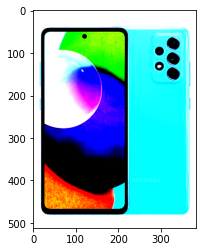

In [ ]:
plt.imshow(image.permute(1,2,0))

# Create dataset

In [ ]:
if IN_COLAB:
    metadata_file = '/content/'
    images_directory = './content/images/'
else:
    metadata_file = './data/metadata.json'
    images_directory = './images/images'

In [ ]:
import torch
from torch import nn

from torchvision import transforms
from torch.utils.data import Dataset

In [ ]:
import numpy as np
from PIL import Image
from pathlib import Path
from tqdm.auto import tqdm
import jsonlines
import os
import json

In [ ]:
def get_image_transform(randomize: bool):
    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
    if randomize:
        return transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ])
    else:
        return transforms.Compose([
#             transforms.Resize(256),
#             transforms.CenterCrop(224),
            transforms.ToTensor(),
            normalize
        ])

In [ ]:
class I2TDataset(Dataset):
    def __init__(
        self,
        metadata_file,
        images_directory,
        tokenizer,
        read_jsonlines = True,
        start = 0,
        end = None,
        randomize = True,
        tqdm_load = False
    ):
        super().__init__()
        self.data = []
        
        if read_jsonlines:
            with jsonlines.open(metadata_file) as reader:
                if tqdm_load:
                    reader = tqdm(reader)
                for obj in reader:
                    self.data.append((obj['image'], obj['queries']))
            self.data = self.data[slice(start, end)]
        else:
            with open(metadata_file) as json_file:
                json_strings = json_file.readlines()
            for json_string in json_strings[start:end]:
                metadata = json.loads(json_string)
                self.data.append((metadata['image'], metadata['queries']))            

        self.images_directory = Path(images_directory)
        self.randomize = randomize
        self.image_transform = get_image_transform(randomize=randomize)
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx: int):
        img, texts = self.data[idx]
        img = Image.open((self.images_directory / f'image_{img}').with_suffix('.jpg'))
        img = img.convert('RGB')
        img = self.image_transform(img)
        if self.randomize:
            text = np.random.choice(texts)
        else:
            text = texts[0]
        return {'image': img, 'text': self.tokenizer.encode_ids(text)}

    @staticmethod
    def collate_fn(items):
        return {
            'image': default_collate([x['image'] for x in items]),
            'text': text_collate_fn([x['text'] for x in items])
        }

In [ ]:
with open(metadata_file) as json_file:
    json_strings = json_file.readlines()

In [ ]:
len(json_strings), json_strings[0]

(5462418,
 '{"image": 1, "queries": ["samsing a52", "samsung a32", "смартфон samsung galaxy a32 128gb awesome violet", "samsung a 52", "samsung galaxy a32 лаванда"]}\n')

In [ ]:
from bpemb import BPEmb

In [ ]:
embedding_size: int = 200
vocab_size: int = 200000

bpemb_ru = BPEmb(lang="ru", dim=embedding_size, vs=vocab_size)

In [ ]:
images = os.listdir(images_directory)
len(images)

93

In [ ]:
dataset = I2TDataset(
    metadata_file,
    images_directory,
    tokenizer = bpemb_ru,
    read_jsonlines = False,
    start = 0,
    end = 50,
    randomize = False,
    tqdm_load = True
)

In [ ]:
len(dataset)

50

In [ ]:
# dataset_item

In [ ]:
bpemb_ru.encode('samsing a52')

['▁sam', 'sing', '▁a', '00']

In [ ]:
bpemb_ru.encode_ids('samsing a52')

[13235, 33493, 449, 4]

# Dataloader

In [ ]:
from torch.utils.data._utils.collate import default_collate

In [ ]:
offsets = [0,3,4,2]
torch.tensor(offsets[:-1]).cumsum(dim=0)

tensor([0, 3, 7])

In [ ]:
def text_collate_fn(items):
    ids = []
    offsets = [0]
    for item in items:
        ids.append(torch.tensor(item, dtype=torch.int64))
        offsets.append(len(item))
    return {
        'ids': torch.cat(ids),
        'offsets': torch.tensor(offsets[:-1]).cumsum(dim=0)
    }

In [ ]:
dataloader = DataLoader(
    dataset,
    batch_size=4,
    collate_fn=dataset.collate_fn,
    shuffle=True,
    num_workers=0,
    drop_last=True
)

In [ ]:
dataloader_iter = iter(dataloader)

In [ ]:
sample_batch = next(dataloader_iter)

In [ ]:
image_batch = sample_batch['image']
image_batch.shape

torch.Size([4, 3, 224, 224])

In [ ]:
text_batch = sample_batch['text']

In [ ]:
text_batch

{'ids': tensor([ 43435,  46588,   8908,  24297,  39930,   3628,  56346,  10334,  30295,
          32669, 199942,  21922,    528,    706,   8030,  73198,  70382,   5595,
            516,    740, 101731,  10614]),
 'offsets': tensor([ 0,  3,  9, 18])}

# TextModel

In [ ]:
embedding_bag = nn.EmbeddingBag.from_pretrained(
    torch.tensor(bpemb_ru.vectors),
    freeze=True,
    sparse=False,
)

In [ ]:
x = embedding_bag(text_batch['ids'], text_batch['offsets'])

In [ ]:
x.shape

torch.Size([4, 200])

In [ ]:
embedding = nn.Embedding.from_pretrained(
    torch.tensor(bpemb_ru.vectors),
    freeze=True,
    sparse=False,
)

In [ ]:
x = embedding(text_batch['ids'])

In [ ]:
x.shape

torch.Size([22, 200])